# Prediction of sales

### Problem Statement
[The dataset](https://drive.google.com/file/d/1B07fvYosBNdIwlZxSmxDfeAf9KaygX89/view?usp=sharing) represents sales data for 1559 products across 10 stores in different cities. Also, attributes of each product and store are available. The aim is to build a predictive model and determine the sales of each product at a particular store.

|Variable|Description|
|: ------------- |:-------------|
|Item_Identifier|Unique product ID|
|Item_Weight|Weight of product|
|Item_Fat_Content|Whether the product is low fat or not|
|Item_Visibility|The % of total display area of all products in a store allocated to the particular product|
|Item_Type|The category to which the product belongs|
|Item_MRP|Maximum Retail Price (list price) of the product|
|Outlet_Identifier|Unique store ID|
|Outlet_Establishment_Year|The year in which store was established|
|Outlet_Size|The size of the store in terms of ground area covered|
|Outlet_Location_Type|The type of city in which the store is located|
|Outlet_Type|Whether the outlet is just a grocery store or some sort of supermarket|
|Item_Outlet_Sales|Sales of the product in the particulat store. This is the outcome variable to be predicted.|

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.



### In following weeks, we will explore the problem in following stages:

1. **Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome**
2. **Data Exploration – looking at categorical & continuous feature summaries and making inferences about the data**
3. **Data Cleaning – imputing missing values in the data and checking for outliers**
4. **Feature Engineering – modifying existing variables and/or creating new ones for analysis**
5. **Model Building – making predictive models on the data**
---------

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Read files:
data = pd.read_csv("regression_exercise.csv", delimiter=',')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [145]:
data['Outlet_Size'] = data['Outlet_Size'].fillna("Unknown")

data['Item_Weight'] = data['Item_Weight'].fillna(value=data['Item_Weight'].mean())
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## 4. Feature Engineering

1. Resolving the issues in the data to make it ready for the analysis.
2. Create some new variables using the existing ones.





### Create a broad category of Type of Item

`Item_Type` variable has many categories which might prove to be very useful in analysis. Look at the `Item_Identifier`, i.e. the unique ID of each item, it starts with either FD, DR or NC. If you see the categories, these look like being Food, Drinks and Non-Consumables. 

**Task:** Use the Item_Identifier variable to create a new column

In [5]:
data['Item_Identifier']

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [146]:
data.loc[data['Item_Identifier'].str.contains('FD'), 'Category'] = 'Food'
data.loc[data['Item_Identifier'].str.contains('DR'), 'Category'] = 'Drink'
data.loc[data['Item_Identifier'].str.contains('NC'), 'Category'] = 'Non-Consumables'

### Determine the years of operation of a store

**Task:** Make a new column depicting the years of operation of a store (i.e. how long the store exists). 

In [147]:
data['Years_Operated'] = 2022 - data['Outlet_Establishment_Year']

### Modify categories of Item_Fat_Content

**Task:** There are difference in representation in categories of Item_Fat_Content variable. This should be corrected.

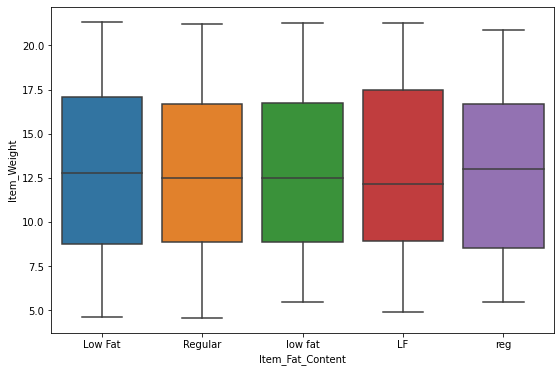

In [55]:
var = 'Item_Fat_Content'
f, ax = plt.subplots(figsize=(9, 6))
fig = sns.boxplot(x=var, y="Item_Weight", data=data)

In [148]:
data['Item_Fat_Content'] = data.Item_Fat_Content.replace({'low fat':'Low Fat',
                                                         'LF':'Low Fat',
                                                         'reg': 'Regular'
                                                           })

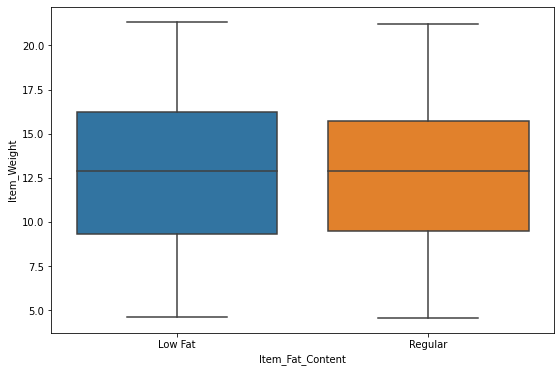

In [137]:
var = 'Item_Fat_Content'
f, ax = plt.subplots(figsize=(9, 6))
fig = sns.boxplot(x=var, y="Item_Weight", data=data)


**Task:** There are some non-consumables as well and a fat-content should not be specified for them. Create a separate category for such kind of observations.

In [149]:
data.loc[data['Category'] == 'Non-Consumables', 'Item_Fat_Content'] = 'No Fat'

In [150]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Category,Years_Operated
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drink,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,23
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800,Food,24
4,NCD19,8.93,No Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumables,35


### Numerical and One-Hot Encoding of Categorical variables

Since scikit-learn algorithms accept only numerical variables, we need to **convert all categorical variables into numeric types.** 

- if the variable is Ordinal we can simply map its values into numbers
- if the variable is Nominal (we cannot sort the values) we need to One-Hot Encode them --> create dummy variables

In [128]:
#Ordinal features Version 1
#data['Outlet_Identifier']=data.Outlet_Identifier.astype('category').cat.codes
#data['Outlet_Type']=data.Outlet_Type.astype('category').cat.codes
#data['Item_Type']=data.Item_Type.astype('category').cat.codes
#data['Outlet_Size']=data.Outlet_Size.astype('category').cat.codes
#data['Outlet_Location_Type']=data.Outlet_Location_Type.astype('category').cat.codes
#data['Category']=data.Category.astype('category').cat.codes
#data['Item_Fat_Content']=data.Item_Fat_Content.astype('category').cat.codes

In [140]:
#Ordinal Features Version 2
new_data = data.replace({"Item_Fat_Content" : {"Low Fat" : 1, "Regular" : 2, "No Fat":0},
                           "Item_Type" : {"Dairy" : 0, "Meat" : 1, "Seafood": 2, 
                                          "Fruits and Vegetables" : 3, "Starchy Foods" : 4, "Breads" : 5, 
                                          "Snack Foods": 6, "Frozen Foods": 7, "Canned" : 8, 
                                         "Baking Goods" : 9, "Breakfast" : 10, 
                                           "Soft Drinks": 11, "Hard Drinks" :12, 
                                          "Household": 13, "Health and Hygiene": 14, "Others":15},
                           "Category" : {"Food" : 0, "Drink" : 1, "Non-Consumables": 2},
                             "Outlet_Location_Type" : {"Tier 1": 1,"Tier 2": 2, "Tier 3": 3},
                             "Outlet_Size" : {"Small" : 0, "Medium" : 1, "High": 2, "Unknown": 3},
                             "Outlet_Type" : {"Grocery Store": 0, "Supermarket Type1": 1, "Supermarket Type2" : 2, "Supermarket Type3": 3}
                        })


In [141]:
#item_identifier and outlet_identifer drop column as unique numbers
new_data.drop('Item_Identifier', axis=1, inplace=True) 
new_data.drop('Outlet_Identifier', axis=1, inplace=True) 


In [142]:
new_data.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Category,Years_Operated
0,9.300000,1,0.016047,0,249.8092,1999,1,1,1,3735.1380,0,23
1,5.920000,2,0.019278,11,48.2692,2009,1,3,2,443.4228,1,13
2,17.500000,1,0.016760,1,141.6180,1999,1,1,1,2097.2700,0,23
3,19.200000,2,0.000000,3,182.0950,1998,3,3,0,732.3800,0,24
4,8.930000,0,0.000000,13,53.8614,1987,2,3,1,994.7052,2,35
5,10.395000,2,0.000000,9,51.4008,2009,1,3,2,556.6088,0,13
6,13.650000,2,0.012741,6,57.6588,1987,2,3,1,343.5528,0,35
7,12.857645,1,0.127470,6,107.7622,1985,1,3,3,4022.7636,0,37
8,16.200000,2,0.016687,7,96.9726,2002,3,2,1,1076.5986,0,20
9,19.200000,2,0.094450,7,187.8214,2007,3,2,1,4710.5350,0,15


In [151]:
#ordinals for second csv
second_data = data.replace({"Item_Fat_Content" : {"Low Fat" : 1, "Regular" : 2, "No Fat":0},
                             "Outlet_Size" : {"Small" : 0, "Medium" : 1, "High": 2, "Unknown": 3} })

#item_identifier and outlet_identifer drop column as unique numbers
second_data.drop('Item_Identifier', axis=1, inplace=True) 
second_data.drop('Outlet_Identifier', axis=1, inplace=True) 

In [154]:
second_data = pd.get_dummies(second_data, prefix = ['Item_Type','Outlet_Location_Type', 'Outlet_Type', 'Category'])

In [155]:
second_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Years_Operated,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Category_Drink,Category_Food,Category_Non-Consumables
0,9.30,1,0.016047,249.8092,1999,1,3735.1380,23,0,0,...,1,0,0,0,1,0,0,0,1,0
1,5.92,2,0.019278,48.2692,2009,1,443.4228,13,0,0,...,0,0,1,0,0,1,0,1,0,0
2,17.50,1,0.016760,141.6180,1999,1,2097.2700,23,0,0,...,1,0,0,0,1,0,0,0,1,0
3,19.20,2,0.000000,182.0950,1998,3,732.3800,24,0,0,...,0,0,1,1,0,0,0,0,1,0
4,8.93,0,0.000000,53.8614,1987,2,994.7052,35,0,0,...,0,0,1,0,1,0,0,0,0,1


**All variables should be by now numeric.**

---------
### Exporting Data

**Task:** You can save the processed data to your local machine as a csv file.

In [143]:
new_data.to_csv('new_food.csv')

In [156]:
second_data.to_csv('new_food_two.csv')